## Assignment 3 submission
__Name:__  Duong Doan Tung

__Student ID:__  21010294

__Programming language used:__  Python

__Programming environment used:__  Jupyter Notebook

---

Run the following cell to import the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Problem 1

In [2]:
#Problem 1
# f(x,y,z) = x**2 * y + sin(z + 6 * y)

def f(x,y,z):
    return x**2 * y + np.sin(z + 6 * y)

# a)
#partial derivatives of f
def df_dx(x,y,z):
    return 2 * x * y

def df_dy(x,y,z):
    return x**2 + 6 * np.cos(z + 6 * y)

def df_dz(x,y,z):
    return np.cos(z + 6 * y)

# b)
#f take a vector of length 3 as input
#show the gradient of f at (3,pi/2,0)
x = 3
y = np.pi/2
z = 0
print("Gradient of f at (3,pi/2,0) is: ", np.array([df_dx(x,y,z), df_dy(x,y,z), df_dz(x,y,z)]))


Gradient of f at (3,pi/2,0) is:  [ 9.42477796  3.         -1.        ]


#### Problem 2

In [3]:
#Problem 2
#f(x,y,z) = x*sin(x*y)

# a)
#partial derivatives of f(x,y)
def df_dy(x,y):
    return x**2 * np.cos(x * y)
def df_dx_dy(x,y):
    return 2*x*np.cos(x*y) - x**2*y*np.sin(x*y) 

# b)
def df_dx(x,y):
    return np.sin(x*y) + x*y*np.cos(x*y)
def df_dy_dx(x,y):
    return 2*x*np.cos(x*y) - x**2*y*np.sin(x*y)



#### Problem 3

In [ ]:
#Problem 3
print()

# a)
def f(x):
    return x.T @ A@x
# b)
def grad_f(A,x):
    return 2*A@x
# c)
def grad_descent(A,x,l,num_inters):
    for i in range(num_inters):
        x = x - l*grad_f(A,x)
        print("\rLearning rate: ", l, "Iteration: ", i+1, "x: ", x,end = "")
    return x

# d)
A = np.array([[1,0],[0,4]])
X = np.random.randint(10,100,2)
L = [1,0.25,0.1,0.01]
for l in L:
    grad_descent(A,X,l,50)
    print('\n------------------------------------')


#### Problem 4

In [ ]:
#Problem 4
#f(x) = [sin(x1*x2*x3),
#       cos(x2 + x3),
#       exp(-1/2*(x2))]
# a)
#calculate the jacobi matrix of f at x = (1,2,3).T
def f(x):
    return np.array([np.sin(x[0]*x[1]*x[2]), np.cos(x[1] + x[2]), np.exp(-1/2*(x[1]))])

def df_dx1(x):
    return np.array([x[1]*x[2]*np.cos(x[0]*x[1]*x[2]), 0, 0])

def df_dx2(x):
    return np.array([x[0]*x[2]*np.cos(x[0]*x[1]*x[2]), -1*np.sin(x[1] + x[2]), 0])

def df_dx3(x):
    return np.array([x[0]*x[1]*np.cos(x[0]*x[1]*x[2]), -1*np.sin(x[1] + x[2]), -1*x[2]*np.exp(-1/2*(x[2]**2))])

x = np.array([1,2,3])
print("Jacobi matrix of f at x = (1,2,3) is: \n", np.array([df_dx1(x), df_dx2(x), df_dx3(x)]).T)
        

# b)

#Determinant of jacob x:
def det_jacob_x(x):
    return np.linalg.det(np.array([df_dx1(x), df_dx2(x), df_dx3(x)]).T)

#or 
def det_jacob_x2(x):
    return x[1]*x[2]**2*(np.exp(-1/2*(x[2]**2))*np.cos(x[0]*x[1]*x[2])*np.sin(x[1]+x[2]))

print("Determinant of jacob x is: ", det_jacob_x(x))
print("Determinant of jacob x is: ", det_jacob_x2(x))

#check if jacob is full rank matrix
print("Is jacob full rank matrix? ", np.linalg.matrix_rank(np.array([df_dx1(x), df_dx2(x), df_dx3(x)]).T) == 3)


#### Problem 5

In [49]:
x = np.array([1,2,3]).reshape(3,1)
mu = np.random.rand(3)
sig = np.array([[1,0,0],[0,1,0],[0,0,1]])
A = np.random.rand(3,5)
B = np.random.rand(3,5)
c = np.random.rand(5).reshape(1,5)





# a)

def grad_traceX(X):
    return 2*X.T

print("Gradient of trace(X) is: ", grad_traceX(x))

# b)

def grad_x_mu(x,mu,sig):
    #get all value in diagonal of sig
    diag_sig = np.diag(sig)
    return (x-mu)/diag_sig

print("Gradient of x-mu is: \n", grad_x_mu(x,mu,sig))

# c)
def grad_c_Ax(c,A,x):
    temp = A * x
    temp[-1,:] = temp[-1,:] - c
    return 2 * (A @ temp.T)
 
print("Gradient of c-Ax is: \n", grad_c_Ax(c,A,x))

# d)
def grad_c_Ax_2(c,A,B,x):
    
    R1 = np.array([A[:,v] if i % 2 == 0 else -B[:,v] for i,v in enumerate(sorted([y for y in range(A.shape[1])]*2))]).T
    #init R2 with matrx 1x10 with value form c: c1,c1,c2,c2...
    R2 = np.array([c[0,i]  for i in sorted([y for y in range(c.shape[1])]*2)])
    for z in range(A.shape[0]):
        Rtemp = np.array([A[z,v] if i % 2 == 1 else -B[z,v] for i,v in enumerate(sorted(
            [y for y in range(A.shape[1])]*2))]).T *x[z]
        R2 = R2 + Rtemp
    return R1 @ R2
 
print("Gradient of c+Ax is: \n", grad_c_Ax_2(c,A,B,x))




Gradient of trace(X) is:  [[2 4 6]]
Gradient of x-mu is: 
 [[0.27991596 0.83304578 0.11059282]
 [1.27991596 1.83304578 1.11059282]
 [2.27991596 2.83304578 2.11059282]]
Gradient of c-Ax is: 
 [[1.45490253 3.4375156  3.58436509]
 [1.7187578  8.67700135 7.11933701]
 [1.69380478 7.42653686 9.10214642]]
Gradient of c+Ax is: 
 [-13.61353783 -13.64577089 -17.98127044]


#### Problem 6

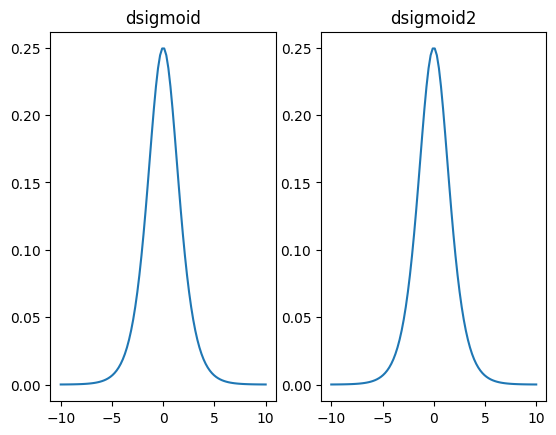

dc_do:  [-0.26894142 -0.03597242 -0.00037018]
dc_d0_2:  [-0.26894142 -0.03597242 -0.00037018]


In [4]:
#Problem 6
# a)

def sigmoid(x):
    return 1/(1+np.exp(-x))
def dsigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))
def dsigmoid2(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

#Verify that dsigmoid == dsigmoid 2
x = np.linspace(-10,10,100)
fig, ax = plt.subplots(1,2)
ax[0].plot(x,dsigmoid(x))
ax[0].set_title("dsigmoid")
ax[1].plot(x,dsigmoid2(x))
ax[1].set_title("dsigmoid2")
plt.show()


# b)

def c(o,x,y):
    return -y*np.log(1/(1+np.exp(-o.T*x))) - (1-y)*np.log(1-1/(1+np.exp(-o.T*x)))

def dc_do(o,x,y):
    return (1/(1+np.exp(-o.T*x))-y)*x

def dc_d0_2(o,x,y):
    return (sigmoid(o.T*x)-y)*x.T

#Verify that dc_do == dc_d0_2
o = np.array([1,2,3])
x = np.array([1,2,3])
y = 1
print("dc_do: ", dc_do(o,x,y))
print("dc_d0_2: ", dc_d0_2(o,x,y))



In [5]:

s = 'abcde'
def subString(s):
  for i in range(len(s)):
    for j in range(i+1, len(s)+1):
      print(s[i:j])
subString(s)

a
ab
abc
abcd
abcde
b
bc
bcd
bcde
c
cd
cde
d
de
e
